<a href="https://colab.research.google.com/github/Mohammad-Amirifard/Intrusion_Detection/blob/main/Intrusion_Detection_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intrusion Detection Using Machine Learning Techniques On CIC-IDS2017 Dataset**

<div style="background-color: #4CAF50; color: white; padding: 20px; text-align: center; border-radius: 10px; margin-bottom: 20px;">
    <h1></h1>
</div>

<h2>Table of Contents</h2>
<ol>
    <li><strong>Import Libraries</strong></li>
    <li><strong>Download CIC-IDS2017 Dataset</strong></li>
    <li><strong>Exploratory Data Analysis (EDA)</strong>
        <ol>
            <li>Load Datasets</li>
            <li>Unique Labels</li>
        </ol>
    </li>
    <li><strong>Feature Engineering</strong>
        <ol>
            <li>Remove Columns Including Unique Items</li>
            <li>Fill inf and NaN Values</li>
            <li>Feature Selection
                <ol>
                    <li>Mutual Info Filter</li>
                    <li>Anova Filter</li>
                    <li>Random Forest</li>
                </ol>
            </li>
        </ol>
    </li>
    <li><strong>Encoding Labels</strong></li>
    <li><strong>Split Dataset</strong></li>
    <li><strong>Normalizing</strong></li>
    <li><strong>Performance Function</strong></li>
    <li><strong>K-Nearest Neighbour Model</strong></li>
    <li><strong>Support Vector Machine (SVM)</strong>
        <ol>
            <li>SVM using Linear Kernel</li>
            <li>SVM using Non-Linear Kernel</li>
        </ol>
    </li>
    <li><strong>Gradient Boosting Tree Model</strong></li>
    <li><strong>Multi-Layer Perceptron (MLP) Model</strong></li>
</ol>


# **Import Libraries**

Here we import libraries on which we need to work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os, gdown
import zipfile, time
import warnings
import joblib
warnings.filterwarnings('ignore')

# **Download CIC-IDS2017 Dataset**

Here we download dataset from google drive and try to unzip it

In [2]:
def download_file_from_google_drive(file_id, destination):
    """
    Input: file_id (Obtained from google drive), destionation (For saving the file)
    Output: _ (Download the file in destination directory)
    """
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, destination, quiet=True)


def unzip_dataset(extraction_dir):

  """
  Input: Extraction_dir (Direction of dataset to unzip into)
  Output: _ (Exract the zip file in the given direction)
  """

  # Ensure the extraction directory exists
  os.makedirs(extraction_dir, exist_ok=True)

  # Unzip the file
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extraction_dir)



# Setup variables to download dataset
current_working_dir = os.getcwd()
destination = current_working_dir
zip_file_path = os.path.join(destination, 'dataset.zip')
file_id =  '1a7z1lGFg-shaBUTfmPewFAebCc8FDhx5' # File Id
extraction_dir = os.path.join(destination,'dataset/')

# call functions
download_file_from_google_drive(file_id, zip_file_path) # Download
unzip_dataset(extraction_dir)                           # Unzip

# **Esploratory Data Analysis**

## Load datasets
On this [link](https://www.unb.ca/cic/datasets/ids-2017.html), You can access to all information about dataset.

In [3]:
# Let's start by Friday day at this note book.
Friday_Morning_pcap_df = pd.read_csv('/content/dataset/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
display(Friday_Morning_pcap_df)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


## Unique labels

No of rows (instances): 191033. 
No of columns (features + Label): 79
****************************************************************************************************
unique_lables: ['BENIGN' 'Bot']
There are [189067] and [1966] traffic flows for normal and attack behaviours, respectively.
Therfore, we see there are two types of traffic: [BENGINE] --> denotes for Normal Traffic and [Bot]-->Denotes for Botent Attack 
As you can the number of anomalies is very small in comparision to Normal points
****************************************************************************************************


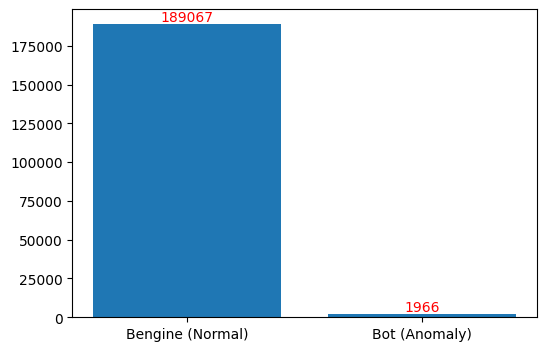

In [4]:
# Let's look at its shape
print(f'No of rows (instances): {Friday_Morning_pcap_df.shape[0]}. \nNo of columns (features + Label): {Friday_Morning_pcap_df.shape[1]}')
print('*'*100)
# Let's look at the type of traffic
# Be careful about column names. some of them include white space.

unique_lables = np.unique(Friday_Morning_pcap_df[" Label"], return_counts=True)[0]
print('unique_lables:',unique_lables)
no_of_Bengine , no_of_Bot = np.unique(Friday_Morning_pcap_df[" Label"], return_counts=True)[1]
print(f'There are [{no_of_Bengine}] and [{no_of_Bot}] traffic flows for normal and attack behaviours, respectively.')

print(f'Therfore, we see there are two types of traffic: [BENGINE] --> denotes for Normal Traffic and [Bot]-->Denotes for Botent Attack ')

# Plot
fig, ax = plt.subplots(figsize=(6,4))
bars = plt.bar(['Bengine (Normal)','Bot (Anomaly)'],[no_of_Bengine,no_of_Bot ])

# Add value labels to each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom',color='r',fontsize=10)

print('As you can the number of anomalies is very small in comparision to Normal points')
print('*'*100)



In [5]:
# Let's look at the features
feature_list = list(Friday_Morning_pcap_df.columns[:-1])
print('Number of features in this list:',len(feature_list))
print('*'*100)
print('name_of_features:\n',feature_list)
print('*'*100)
print(" Oops, lots of features. Let's do feature engineering")

Number of features in this list: 78
****************************************************************************************************
name_of_features:
 [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean'

# **Featrue Engineering**

## Remove columns including unique items

In [6]:
# Let's look at all of them and find thier uniqe items

# We can remove those which have one unique item, meaning taht they cannot affect the label result.
def remove_features_with_one_item(dataframe,feature_list):

  """
  This function find columns that have just a unique item, meaning that these columns don't affect target.So, We should remove them.
  Input: dataframe,feature_list
  Output: new_feature_list and new_dataframe which have less values.
  """

  removed_feature_list = []
  for feature in feature_list:
    unique_items = np.unique(dataframe[feature])
    if len(unique_items)>1 : # Bigger than 1 means we have more than 1 unique item in this feature.
      removed_feature_list.append(feature)
      feature_list.remove(feature)

    else:
      pass


  print('The following features have been removed from the original dataframe.')
  print(removed_feature_list)
  new_feature_list = feature_list
  new_dataframe = dataframe.drop(removed_feature_list,axis=1)

  return new_feature_list, new_dataframe


# Call function
feature_list, Friday_Morning_pcap_df = remove_features_with_one_item(Friday_Morning_pcap_df,feature_list)
# Now, let's again look at shape
print('*'*100)
print(f'No of rows (instances): {Friday_Morning_pcap_df.shape[0]}. \nNo of columns (features + Label): {Friday_Morning_pcap_df.shape[1]}')
print('Great we dropped 35 features, since they had one uniqe item in different instances.')

The following features have been removed from the original dataframe.
[' Destination Port', ' Total Fwd Packets', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Mean', 'Bwd Packet Length Max', ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow IAT Mean', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Std', ' Fwd IAT Min', ' Bwd IAT Mean', ' Bwd IAT Max', 'Fwd PSH Flags', ' Fwd Header Length', 'Fwd Packets/s', ' Min Packet Length', ' Packet Length Mean', ' Packet Length Variance', ' SYN Flag Count', ' PSH Flag Count', ' URG Flag Count', ' ECE Flag Count', ' Average Packet Size', ' Avg Bwd Segment Size', 'Subflow Fwd Packets', ' Subflow Bwd Packets', 'Init_Win_bytes_forward', ' act_data_pkt_fwd', 'Active Mean', ' Active Max', 'Idle Mean', ' Idle Max']
****************************************************************************************************
No of rows (instances): 191033. 
No of columns (features + Label): 44
Great we dropped 35 features, since they ha

## Fill inf and Nan values

In [7]:
# Look at inf values

index_of_inf_values1,column_of_inf_values1 = np.where(Friday_Morning_pcap_df==np.inf)
print('Index_list of + inf values:\n',index_of_inf_values1)
print('\nColumn_list of + inf values:\n',column_of_inf_values1)
print('*'*100)
index_of_inf_values2,column_of_inf_values2 = np.where(Friday_Morning_pcap_df==-np.inf)
print('Index_list of - inf values:\n',index_of_inf_values2)
print('\nColumn_list of - inf values:\n',column_of_inf_values2)

print('*'*100)
print('As shown above, in column number 7, we have values which are infinitive.')
print('So, we can replace them with nan values.')
Friday_Morning_pcap_df.replace([np.inf, -np.inf], np.nan, inplace=True)

Index_list of + inf values:
 [   604   3786   4153   4466   4752   9581  10832  11779  12504  13094
  13951  14040  14184  16847  17875  20901  23787  23789  24347  25236
  26374  28318  29371  30607  31119  33627  33722  33777  34227  34541
  34807  36102  36706  36883  37288  37613  38012  39136  39729  40413
  40764  41273  41712  42738  45523  47530  48247  49812  51755  57793
  57882  61076  61720  63707  63864  64068  68927  70359  70816  75928
  75995  76440  79160  81067  83716  85711  87667  87757  90318  99360
 100201 105019 106564 106609 106651 107314 107340 110930 112381 113085
 114045 116998 117839 118456 119001 120282 121388 122940 124354 125960
 126281 126396 126402 127763 130158 131386 131841 131982 132000 132577
 134183 134212 135230 135275 143968 145694 154035 158875 161712 163868
 164857 168525 170147 171777 172787 173029 177124 180400 186036 188958
 189205 190183]

Column_list of + inf values:
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7

In [8]:
# Let's look at missing values.

print("The following data shows that we have several missing values in our dataset")
print('*'*100)
Friday_Morning_pcap_df.isnull().sum()


The following data shows that we have several missing values in our dataset
****************************************************************************************************


,0
Flow Duration,0
Total Backward Packets,0
Total Length of Bwd Packets,0
Fwd Packet Length Min,0
Fwd Packet Length Std,0
Bwd Packet Length Min,0
Bwd Packet Length Std,0
Flow Packets/s,122
Flow IAT Std,0
Flow IAT Min,0


In [9]:
# We can fill nan  values forward fill method
Friday_Morning_pcap_df.ffill(inplace = True)

# Let's look at missing values again.
print("The following data shows that we don't have several missing values in our dataset")
print('*'*100)

Friday_Morning_pcap_df.isnull().sum()


The following data shows that we don't have several missing values in our dataset
****************************************************************************************************


,0
Flow Duration,0
Total Backward Packets,0
Total Length of Bwd Packets,0
Fwd Packet Length Min,0
Fwd Packet Length Std,0
Bwd Packet Length Min,0
Bwd Packet Length Std,0
Flow Packets/s,0
Flow IAT Std,0
Flow IAT Min,0


## Feature Selection

In [10]:
Friday_Morning_pcap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191033 entries, 0 to 191032
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Flow Duration                191033 non-null  int64  
 1    Total Backward Packets       191033 non-null  int64  
 2    Total Length of Bwd Packets  191033 non-null  int64  
 3    Fwd Packet Length Min        191033 non-null  int64  
 4    Fwd Packet Length Std        191033 non-null  float64
 5    Bwd Packet Length Min        191033 non-null  int64  
 6    Bwd Packet Length Std        191033 non-null  float64
 7    Flow Packets/s               191033 non-null  float64
 8    Flow IAT Std                 191033 non-null  float64
 9    Flow IAT Min                 191033 non-null  int64  
 10   Fwd IAT Mean                 191033 non-null  float64
 11   Fwd IAT Max                  191033 non-null  int64  
 12  Bwd IAT Total                 191033 non-nul

### 1_Mutual Info filter

In [11]:
# As shown above, all features have type of int64 or float64, which means we are dealing with numerical features.
# Now, here we can use Mutual Information
from sklearn.feature_selection import mutual_info_classif

def Mutual_info(df,feature_list):

  """
  This function finds the mutual information score for each feature and target pair.
  Input: df (dataframe), feature_list (the list of feature otained before)
  output: best_feature_list (Those ones have highest scores)
  """
  # Compute Mutual Information between each feature and the target
  X = df[feature_list]
  y = df[' Label']
  mi_scores = mutual_info_classif(X, y)

  # Create a DataFrame to view the scores alongside feature names
  mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Scores'])

  # Sort
  mi_scores_df = mi_scores_df.sort_values(by='MI Scores',ascending=False)
  print("Let's see 20 most important features:")
  best_feature_list = mi_scores_df[:20].index
  display(mi_scores_df[:20])

  return best_feature_list

In [12]:
best_feature_list_from_MI = Mutual_info(df=Friday_Morning_pcap_df,feature_list=feature_list)

Let's see 20 most important features:


,MI Scores
Packet Length Std,0.035300
min_seg_size_forward,0.035153
Init_Win_bytes_backward,0.034340
Total Length of Bwd Packets,0.031296
Subflow Bwd Bytes,0.031294
Fwd Header Length.1,0.030671
Subflow Fwd Bytes,0.028876
Bwd Header Length,0.026716
Max Packet Length,0.026477
Bwd IAT Min,0.025656


### 2_Anova filter

In [13]:
from sklearn.feature_selection import f_classif

def Anova_filter(df,feature_list):

  """
  This function finds the Anova score for each feature and target pair.
  Input: df (dataframe), feature_list (the list of feature otained before)
  output: best_feature_list (Those ones have highest scores)
  """
  # Compute Anova between each feature and the target
  X = df[feature_list]
  y = df[' Label']
  anova_scores = f_classif(X, y)

  # Create a DataFrame to view the scores alongside feature names
  anova_scores_df = pd.DataFrame(anova_scores[1], index=X.columns, columns=['Anova_scores (p_value)'])

  # Sort
  print("Let's see 20 most important features got from Anova Test:")
  anova_scores_df = anova_scores_df.sort_values(by='Anova_scores (p_value)')
  best_feature_list = anova_scores_df[:20].index
  display(anova_scores_df[:20])

  return best_feature_list

In [14]:
best_feature_list_from_Anova = Anova_filter(df=Friday_Morning_pcap_df,feature_list=feature_list)

Let's see 20 most important features got from Anova Test:


,Anova_scores (p_value)
Bwd Packet Length Min,2.218135e-209
min_seg_size_forward,2.979176e-137
Bwd Packets/s,2.241920e-122
Avg Fwd Segment Size,4.368088e-121
Fwd Packet Length Min,1.795451e-117
Fwd Packet Length Std,1.320449e-85
Flow Duration,1.860188e-60
Bwd Packet Length Std,2.266561e-54
Bwd IAT Total,6.881072e-52
Fwd IAT Max,1.069631e-38


### 3_Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
def RF_ensembel(df,feature_list):

  """
  This function finds the Random Forest score for each feature and target pair.
  Input: df (dataframe), feature_list (the list of feature otained before)
  output: best_feature_list (Those ones have highest scores)
  """

  X = df[feature_list]
  y = df[' Label']
  RF_classifier = RandomForestClassifier()
  model = RF_classifier.fit(X,y)
  # Get feature importances
  RF_socres = model.feature_importances_

  # Create a DataFrame to view the scores alongside feature names
  RF_socres_df = pd.DataFrame(RF_socres, index=X.columns, columns=['Random_Forest_score'])

  # Sort
  print("Let's see 20 most important features got from Random Forest:")
  RF_socres_df = RF_socres_df.sort_values(by='Random_Forest_score',ascending=False)
  best_feature_list = RF_socres_df[:20].index
  display(RF_socres_df[:20])

  return best_feature_list

In [16]:
best_feature_list_from_RF = RF_ensembel(df=Friday_Morning_pcap_df,feature_list=feature_list)

Let's see 20 most important features got from Random Forest:


,Random_Forest_score
Init_Win_bytes_backward,0.164064
Bwd Packets/s,0.066880
Flow Duration,0.061385
Bwd IAT Min,0.058966
Total Length of Bwd Packets,0.055987
Subflow Bwd Bytes,0.052603
Bwd IAT Std,0.046596
Subflow Fwd Bytes,0.042401
Bwd Packet Length Std,0.039425
Flow Packets/s,0.038198


# **Encoding Labels**

In [17]:
# Before spliting, we need to encode labels.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Friday_Morning_pcap_df[' Label'] = encoder.fit_transform(Friday_Morning_pcap_df[' Label'])

# **Split dataset**

In [18]:
from sklearn.model_selection import train_test_split
def spliting(df, best_feature_list):

  X = df[best_feature_list]
  y  = df[' Label']

  our_X_train, our_x_test, our_y_train, our_y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=True)
  print('X_train.shape:',our_X_train.shape)
  print('x_test.shape:',our_x_test.shape)
  print('y_train.shape:',our_y_train.shape)
  print('y_test.shape:',our_y_test.shape)
  no_of_anomalies_in_test_part = np.where(our_y_test==1)[0].shape[0]
  no_of_normal_points_in_test_part = np.where(our_y_test==0)[0].shape[0]
  print(f'In the test dataset we have:{no_of_anomalies_in_test_part} anomalies and {no_of_normal_points_in_test_part} normal points')
  print('*'*100)
  return our_X_train, our_x_test, our_y_train, our_y_test

# **Normalizing**

In [19]:
from sklearn.preprocessing import StandardScaler

def normalizing(X_train, x_test):

  scaler = StandardScaler()
  our_X_train = scaler.fit_transform(X_train)
  our_x_test = scaler.transform(x_test)
  print('After Normalizing we have:')
  print('X_train_normalized.shape:',our_X_train.shape)
  print('x_test_normalized.shape:',our_x_test.shape)
  print('*'*100)

  return our_X_train, our_x_test

# **Performance function**

In [20]:
from sklearn import metrics
performance_table = pd.DataFrame({'Model_name':[],'Feature_selection_method':[],'Precision':[],'Recall':[],'F1_Score':[],'Training_time':[],'Predicting_time':[]})

def perfomrance(model_name,Feature_selection_method, y_pred, y_true,train_time,pred_time):

  """
  This funcution aims to return the performance of the model based on the specified metircs.
  Input: model_name (The name of model you ran), y_pred (The predicted value you obtained), y_true(The real values you have from dataset)
  Output: perfomance_table (Shows the metrics you are looking for), Confusion_matrix (Shows TP,TN,FP,FN)

  """

  global performance_table
  precision = metrics.precision_score(y_pred=y_pred, y_true=y_true)
  recall = metrics.recall_score(y_pred=y_pred, y_true=y_true)
  f1_score = metrics.f1_score(y_pred=y_pred, y_true=y_true)
  confusion_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_true)

  new_df_to_add = pd.DataFrame({'Model_name':[model_name],'Feature_selection_method':[Feature_selection_method],'Precision':[precision],'Recall':[recall],'F1_Score':[f1_score],'Training_time':[train_time],'Predicting_time':[pred_time]})
  performance_table = pd.concat([performance_table, new_df_to_add], ignore_index=True)
  return performance_table, confusion_matrix

# **K-Nearest Neighbour Model**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Step0) Hyperparameters
k = 3 # Number of neighbors
p = 2 # Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
metric = 'minkowski' # Or it can be 'euclidean' , 'manhattan', 'l2'

# Step1) We start running models with best feature list obtained from Random Forest
best_feature_list = best_feature_list_from_RF
print('This result is for best feature list obtained from Random Foresrt method:')
print('-'*100)

# Step2) Splitting
X_train, x_test, y_train, y_test = spliting(df= Friday_Morning_pcap_df, best_feature_list= best_feature_list)

# Step3) Normalizing
X_train_normalized, x_test_normalized = normalizing(X_train, x_test)

# Define Model
def knn_model(X_train_normalized,y_train,k):

  knn = KNeighborsClassifier(n_neighbors=k)

  start_time = time.time()
  model = knn.fit(X_train_normalized,y_train )
  stop_time = time.time()

  train_time = (stop_time-start_time)/60

  return model, train_time

# Step4) Call Model
k_NN_model, train_time = knn_model(X_train_normalized,y_train,k)

# Define pred function
def pred_knn(model,x_test_normalized):

  start_time = time.time()
  predictions = model.predict(x_test_normalized)
  stop_time = time.time()

  pred_time = (stop_time-start_time)/60

  return predictions,pred_time

# Step5) Call pred function
y_pred, pred_time = pred_knn(k_NN_model,x_test_normalized)

# Step6) Call Performance
performance_table = pd.DataFrame({'Model_name':[],'Feature_selection_method':[],'Precision':[],'Recall':[],'F1_Score':[],'Training_time':[],'Predicting_time':[]})
performance_table, confusion_matrix = perfomrance(model_name='K_nn',Feature_selection_method='Random_Forest',y_pred=y_pred, y_true=y_test, train_time=train_time,pred_time=pred_time)
display(performance_table)
print('*'*1000)
print('Confusion Matrix:')
print(f'[[TN={confusion_matrix[0][0]}  FP={confusion_matrix[0][1]}]')
print(f' [FN={confusion_matrix[1][0]}  TP={confusion_matrix[1][1]}]]')

This result is for best feature list obtained from Random Foresrt method:
----------------------------------------------------------------------------------------------------
X_train.shape: (152826, 20)
x_test.shape: (38207, 20)
y_train.shape: (152826,)
y_test.shape: (38207,)
In the test dataset we have:393 anomalies and 37814 normal points
****************************************************************************************************
After Normalizing we have:
X_train_normalized.shape: (152826, 20)
x_test_normalized.shape: (38207, 20)
****************************************************************************************************


,Model_name,Feature_selection_method,Precision,Recall,F1_Score,Training_time,Predicting_time
0,K_nn,Random_Forest,0.879154,0.740458,0.803867,0.000386,0.574776


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [22]:
#The result is good but we can do better. Let's try different feature lsit obtained from feature selection part.

# Step1) Choose another set of features
best_feature_list = best_feature_list_from_MI
print('This result is for best feature list obtained from Mutual Information method:')
print('-'*100)

# Step2) Splitting
X_train, x_test, y_train, y_test = spliting(df= Friday_Morning_pcap_df, best_feature_list= best_feature_list)

# Step3) Normalizing
X_train_normalized, x_test_normalized = normalizing(X_train, x_test)

# Step4) Call Model
k_NN_model, train_time = knn_model(X_train_normalized,y_train,k)

# Step5) Call pred function
y_pred, pred_time = pred_knn(k_NN_model,x_test_normalized)


# Step6) Call Performance
performance_table, confusion_matrix = perfomrance(model_name='K_nn',Feature_selection_method='Mutual_Information',y_pred=y_pred, y_true=y_test, train_time=train_time,pred_time=pred_time)
display(performance_table)
print('*'*1000)
print('Confusion Matrix:')
print(f'[[TN={confusion_matrix[0][0]}  FP={confusion_matrix[0][1]}]')
print(f' [FN={confusion_matrix[1][0]}  TP={confusion_matrix[1][1]}]]')

This result is for best feature list obtained from Mutual Information method:
----------------------------------------------------------------------------------------------------
X_train.shape: (152826, 20)
x_test.shape: (38207, 20)
y_train.shape: (152826,)
y_test.shape: (38207,)
In the test dataset we have:393 anomalies and 37814 normal points
****************************************************************************************************
After Normalizing we have:
X_train_normalized.shape: (152826, 20)
x_test_normalized.shape: (38207, 20)
****************************************************************************************************


,Model_name,Feature_selection_method,Precision,Recall,F1_Score,Training_time,Predicting_time
0,K_nn,Random_Forest,0.879154,0.740458,0.803867,0.000386,0.574776
1,K_nn,Mutual_Information,0.884848,0.743003,0.807746,0.000512,0.563184


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [23]:
#The result is good but we can do better. Let's try different feature lsit obtained from feature selection part.

# Step1) Choose another set of features
best_feature_list = best_feature_list_from_Anova
print('This result is for best feature list obtained from Anova method:')
print('-'*100)

# Step2) Splitting
X_train, x_test, y_train, y_test = spliting(df= Friday_Morning_pcap_df, best_feature_list= best_feature_list)

# Step3) Normalizing
X_train_normalized, x_test_normalized = normalizing(X_train, x_test)

# Step4) Call Model
k_NN_model, train_time = knn_model(X_train_normalized,y_train,k)

# Step5) Call pred function
y_pred, pred_time = pred_knn(k_NN_model,x_test_normalized)


# Step6) Call Performance
performance_table, confusion_matrix = perfomrance(model_name='K_nn',Feature_selection_method='Anova',y_pred=y_pred, y_true=y_test, train_time=train_time,pred_time=pred_time)
display(performance_table)
print('*'*1000)
print('Confusion Matrix:')
print(f'[[TN={confusion_matrix[0][0]}  FP={confusion_matrix[0][1]}]')
print(f' [FN={confusion_matrix[1][0]}  TP={confusion_matrix[1][1]}]]')


This result is for best feature list obtained from Anova method:
----------------------------------------------------------------------------------------------------
X_train.shape: (152826, 20)
x_test.shape: (38207, 20)
y_train.shape: (152826,)
y_test.shape: (38207,)
In the test dataset we have:393 anomalies and 37814 normal points
****************************************************************************************************
After Normalizing we have:
X_train_normalized.shape: (152826, 20)
x_test_normalized.shape: (38207, 20)
****************************************************************************************************


,Model_name,Feature_selection_method,Precision,Recall,F1_Score,Training_time,Predicting_time
0,K_nn,Random_Forest,0.879154,0.740458,0.803867,0.000386,0.574776
1,K_nn,Mutual_Information,0.884848,0.743003,0.807746,0.000512,0.563184
2,K_nn,Anova,0.892966,0.743003,0.811111,0.000272,0.553134


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [24]:
# So, as shown above the best feature list belongs to Anova filter
best_feature_list  = best_feature_list_from_Anova
print('best_feature_list:\n',best_feature_list)

# So from now on, we work on the feature list obtained from Anoval Filter
# We don't need the result for RF and MI
performance_table.drop(performance_table.index[0:2],inplace=True)

best_feature_list:
 Index([' Bwd Packet Length Min', ' min_seg_size_forward', ' Bwd Packets/s',
       ' Avg Fwd Segment Size', ' Fwd Packet Length Min',
       ' Fwd Packet Length Std', ' Flow Duration', ' Bwd Packet Length Std',
       'Bwd IAT Total', ' Fwd IAT Max', ' Idle Min', ' ACK Flag Count',
       ' Subflow Fwd Bytes', ' Flow IAT Std', ' Bwd IAT Std', ' Fwd IAT Mean',
       ' Packet Length Std', ' Bwd IAT Min', ' Init_Win_bytes_backward',
       'FIN Flag Count'],
      dtype='object')


In [25]:
#Let's do hypertuning on CNN
# Do the following part just only for more sure
####################################################################



# from sklearn.model_selection import GridSearchCV

# # Step1) Choose the best feature list
# best_feature_list = best_feature_list_from_Anova
# print('This result is for best feature list obtained from Anova method:')
# print('-'*100)

# # Step2) Splitting
# X_train, x_test, y_train, y_test = spliting(df= Friday_Morning_pcap_df, best_feature_list= best_feature_list)

# # Step3) Normalizing
# X_train_normalized, x_test_normalized = normalizing(X_train, x_test)

# # Step4) # Define the parameter grid and estimator
# param_grid = {
#     'n_neighbors': [3,5],
#      'p' : [2],
#     'weights': ['uniform','distance'],
#     'metric': ['euclidean', 'manhattan','minkowski']
# }
# cross_validation  = 5
# knn = KNeighborsClassifier()

# # Step5) Perform GridSearchCV
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cross_validation,verbose=3, scoring='f1')
# grid_search.fit(X_train_normalized, y_train)

# #Save this model to use later
# best_knn = grid_search.best_estimator_
# joblib.dump(best_knn, 'best_knn_model.pkl')
# # Print the best parameters and the best score
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")


# # Step1) Call pred function
# y_pred, pred_time = pred_knn(best_knn,x_test_normalized)


# # Step6) Call Performance
# performance_table, confusion_matrix = perfomrance(model_name='Tuned_KNN',
#                                                   Feature_selection_method='Anova',y_pred=y_pred,
#                                                   y_true=y_test, train_time=train_time,pred_time=pred_time)
# display(performance_table)
# print('*'*1000)
# print('Confusion Matrix:')
# print(f'[[TN={confusion_matrix[0][0]}  FP={confusion_matrix[0][1]}]')
# print(f' [FN={confusion_matrix[1][0]}  TP={confusion_matrix[1][1]}]]')



# **SVM Model**

## 1_SVM using linear kernel

In [26]:
# First we start with linear SVM using linear kernel
from sklearn.svm import LinearSVC

# Step0) Hyperparameters
regularization_term = 'l2'
regularization_parameter = 1.5
loss_function = 'hinge'
max_iter = 1000


# Step1) Choose another set of features
best_feature_list = best_feature_list_from_Anova
print('This result is for best feature list obtained from Anova method:')
print('-'*100)

# Step2) Splitting
X_train, x_test, y_train, y_test = spliting(df= Friday_Morning_pcap_df, best_feature_list= best_feature_list)

# Step3) Normalizing
X_train_normalized, x_test_normalized = normalizing(X_train, x_test)

# Step4) Define Model

def Linear_SVM(X_train_normalized,y_train,regularization_term,regularization_parameter,loss_function,max_iter):

  linear_svm = LinearSVC(
      penalty=regularization_term,
      C=regularization_parameter,
      loss=loss_function,
      max_iter=max_iter)

  start_time = time.time()
  model = linear_svm.fit(X_train_normalized,y_train)
  stop_time = time.time()
  train_time = (stop_time-start_time)/60

  return model, train_time

# Step5) Call Model
Linear_SVM_model, train_time = Linear_SVM(X_train_normalized,y_train,regularization_term,regularization_parameter,loss_function,max_iter)


# Define pred function
def pred_svm(model,x_test_normalized):

  start_time = time.time()
  predictions = model.predict(x_test_normalized)
  stop_time = time.time()

  pred_time = (stop_time-start_time)/60

  return predictions,pred_time

# Step6) Call pred function
y_pred, pred_time = pred_svm(Linear_SVM_model,x_test_normalized)

# Step7) Call Performance
performance_table, confusion_matrix = perfomrance(model_name='Linear_SVM_model',Feature_selection_method='Anova',y_pred=y_pred, y_true=y_test, train_time=train_time,pred_time=pred_time)
display(performance_table)
print('*'*1000)
print('Confusion Matrix:')
print(f'[[TN={confusion_matrix[0][0]}  FP={confusion_matrix[0][1]}]')
print(f' [FN={confusion_matrix[1][0]}  TP={confusion_matrix[1][1]}]]')

This result is for best feature list obtained from Anova method:
----------------------------------------------------------------------------------------------------
X_train.shape: (152826, 20)
x_test.shape: (38207, 20)
y_train.shape: (152826,)
y_test.shape: (38207,)
In the test dataset we have:393 anomalies and 37814 normal points
****************************************************************************************************
After Normalizing we have:
X_train_normalized.shape: (152826, 20)
x_test_normalized.shape: (38207, 20)
****************************************************************************************************


,Model_name,Feature_selection_method,Precision,Recall,F1_Score,Training_time,Predicting_time
0,K_nn,Anova,0.892966,0.743003,0.811111,0.000272,0.553134
1,Linear_SVM_model,Anova,0.700000,0.623410,0.659489,0.189521,0.000033


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

## 2_SVM using non_linear kernel

In [27]:
from sklearn.svm import SVC

# Step0) Hyperparameters
kernel = 'rbf'
degree = 2
regularization_parameter = 1

# Step1) Choose another set of features
best_feature_list = best_feature_list_from_Anova
print('This result is for best feature list obtained from Anova method:')
print('-'*100)

# Step2) Splitting
X_train, x_test, y_train, y_test = spliting(df= Friday_Morning_pcap_df, best_feature_list= best_feature_list)

# Step3) Normalizing
X_train_normalized, x_test_normalized = normalizing(X_train, x_test)


# Step4) Define Model

def Poly_SVM(X_train_normalized,y_train,kernel,regularization_parameter,degree):

  linear_svm = SVC(
      kernel=kernel,
      C=regularization_parameter,
      degree=degree)

  start_time = time.time()
  model = linear_svm.fit(X_train_normalized,y_train)
  stop_time = time.time()
  train_time = (stop_time-start_time)/60

  return model, train_time

# Step5) Call Model
poly_SVM_model, train_time = Poly_SVM(X_train_normalized,y_train,kernel,regularization_parameter,degree)


# Define pred function
def pred_svm(model,x_test_normalized):

  start_time = time.time()
  predictions = model.predict(x_test_normalized)
  stop_time = time.time()

  pred_time = (stop_time-start_time)/60

  return predictions,pred_time

# Step6) Call pred function
y_pred, pred_time = pred_svm(poly_SVM_model,x_test_normalized)

# Step7) Call Performance
performance_table, confusion_matrix = perfomrance(model_name='Poly_SVM_model',Feature_selection_method='Anova',y_pred=y_pred, y_true=y_test, train_time=train_time,pred_time=pred_time)
display(performance_table)
print('*'*1000)
print('Confusion Matrix:')
print(f'[[TN={confusion_matrix[0][0]}  FP={confusion_matrix[0][1]}]')
print(f' [FN={confusion_matrix[1][0]}  TP={confusion_matrix[1][1]}]]')

This result is for best feature list obtained from Anova method:
----------------------------------------------------------------------------------------------------
X_train.shape: (152826, 20)
x_test.shape: (38207, 20)
y_train.shape: (152826,)
y_test.shape: (38207,)
In the test dataset we have:393 anomalies and 37814 normal points
****************************************************************************************************
After Normalizing we have:
X_train_normalized.shape: (152826, 20)
x_test_normalized.shape: (38207, 20)
****************************************************************************************************


,Model_name,Feature_selection_method,Precision,Recall,F1_Score,Training_time,Predicting_time
0,K_nn,Anova,0.892966,0.743003,0.811111,0.000272,0.553134
1,Linear_SVM_model,Anova,0.700000,0.623410,0.659489,0.189521,0.000033
2,Poly_SVM_model,Anova,0.763077,0.631043,0.690808,0.561419,0.116964


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# **GBoosting Tree Model**

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

# Step0) Hyperparameters
learning_rate = 0.1
n_estimators = 150

# Step1) Choose another set of features
best_feature_list = best_feature_list_from_Anova
print('This result is for best feature list obtained from Anova method:')
print('-'*100)

# Step2) Splitting
X_train, x_test, y_train, y_test = spliting(df= Friday_Morning_pcap_df, best_feature_list= best_feature_list)

# Step3) Normalizing
X_train_normalized, x_test_normalized = normalizing(X_train, x_test)


# Step4) Define Model

def GBoost(X_train_normalized,y_train,learning_rate,n_estimators):

  xgboost = GradientBoostingClassifier(
      learning_rate=learning_rate,
      n_estimators=n_estimators)

  start_time = time.time()
  model = xgboost.fit(X_train_normalized,y_train)
  stop_time = time.time()
  train_time = (stop_time-start_time)/60

  return model, train_time

# Step5) Call Model
GBoost_model, train_time = GBoost(X_train_normalized,y_train,learning_rate,n_estimators)


# Step6) Call pred function
y_pred, pred_time = pred_svm(GBoost_model,x_test_normalized)

# Step7) Call Performance
performance_table, confusion_matrix = perfomrance(model_name='GBoost_model',Feature_selection_method='Anova',y_pred=y_pred, y_true=y_test, train_time=train_time,pred_time=pred_time)
display(performance_table)
print('*'*1000)
print('Confusion Matrix:')
print(f'[[TN={confusion_matrix[0][0]}  FP={confusion_matrix[0][1]}]')
print(f' [FN={confusion_matrix[1][0]}  TP={confusion_matrix[1][1]}]]')

This result is for best feature list obtained from Anova method:
----------------------------------------------------------------------------------------------------
X_train.shape: (152826, 20)
x_test.shape: (38207, 20)
y_train.shape: (152826,)
y_test.shape: (38207,)
In the test dataset we have:393 anomalies and 37814 normal points
****************************************************************************************************
After Normalizing we have:
X_train_normalized.shape: (152826, 20)
x_test_normalized.shape: (38207, 20)
****************************************************************************************************


,Model_name,Feature_selection_method,Precision,Recall,F1_Score,Training_time,Predicting_time
0,K_nn,Anova,0.892966,0.743003,0.811111,0.000272,0.553134
1,Linear_SVM_model,Anova,0.700000,0.623410,0.659489,0.189521,0.000033
2,Poly_SVM_model,Anova,0.763077,0.631043,0.690808,0.561419,0.116964
3,GBoost_model,Anova,0.950495,0.732824,0.827586,1.483498,0.000968


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# **MLP Model**

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import plot_model

# Step0) Hyperparameters

no_neurons_1 = 64
no_neurons_2 = 128
no_neurons_3 = 128
dropout_rate = 0.2
epoch = 10
batch_size = 32
learning_rate = 0.0001
activation ='relu'

# Step1) Choose another set of features
best_feature_list = best_feature_list_from_Anova
print('This result is for best feature list obtained from Anova method:')
print('-'*100)

# Step2) Splitting
X_train, x_test, y_train, y_test = spliting(df= Friday_Morning_pcap_df, best_feature_list= best_feature_list)

# Step3) Normalizing
X_train_normalized, x_test_normalized = normalizing(X_train, x_test)

# Step4) Define Model
def mlp_model(X_train_normalized,no_neurons_1,no_neurons_2,activation,dropout_rate,learning_rate):

  input_shape = X_train_normalized.shape[1]
  input = keras.Input(shape=(input_shape,),name='Input')
  first_layer = layers.Dense(units = no_neurons_1,activation=activation,name='1st_hidden_layer')(input)
  dropout_layer_1 =  layers.Dropout(dropout_rate,name='dropout_layer_1')(first_layer)
  second_layer = layers.Dense(units = no_neurons_2,activation=activation,name='2nd_hidden_layer')(dropout_layer_1)
  dropout_layer_2 =  layers.Dropout(1.5* dropout_rate,name='dropout_layer_2')(second_layer)
  third_layer = layers.Dense(units = no_neurons_3,activation=activation,name='3rd_hidden_layer')(dropout_layer_2)
  output = layers.Dense(units = 1,activation='sigmoid',name='Output')(third_layer)

  # Create model
  model = keras.Model(inputs=input, outputs=output, name="mlp_model")
  model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy'])
  model.summary()

  return model

# Step5) Call Model
mlp_model = mlp_model(X_train_normalized,no_neurons_1,no_neurons_2,activation,dropout_rate,learning_rate)
plot_model(mlp_model, to_file='mlp_model.png', show_shapes=True, show_layer_names=True,dpi=100)


# Step6) Fit and Predict
history = mlp_model.fit(X_train_normalized, y_train, batch_size=batch_size, epochs=epoch, validation_split=0.2)

# Step7) Call Performance
y_pred_proba = mlp_model.predict(x_test_normalized)
y_pred = (y_pred_proba >= 0.5).astype(int)
performance_table, confusion_matrix = perfomrance(model_name='MLP',Feature_selection_method='Anova',y_pred=y_pred, y_true=y_test, train_time=train_time,pred_time=pred_time)
display(performance_table)
print('*'*1000)
print('Confusion Matrix:')
print(f'[[TN={confusion_matrix[0][0]}  FP={confusion_matrix[0][1]}]')
print(f' [FN={confusion_matrix[1][0]}  TP={confusion_matrix[1][1]}]]')

This result is for best feature list obtained from Anova method:
----------------------------------------------------------------------------------------------------
X_train.shape: (152826, 20)
x_test.shape: (38207, 20)
y_train.shape: (152826,)
y_test.shape: (38207,)
In the test dataset we have:393 anomalies and 37814 normal points
****************************************************************************************************
After Normalizing we have:
X_train_normalized.shape: (152826, 20)
x_test_normalized.shape: (38207, 20)
****************************************************************************************************


Model: "mlp_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1st_hidden_layer (Dense)             │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_layer_1 (Dropout)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 2nd_hidden_layer (Dense)             │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_layer_2 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 3rd_hidden_layer (Dense)             │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,305 (102.75 KB)

 Trainable params: 26,305 (102.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9570 - loss: 0.1227 - val_accuracy: 0.9937 - val_loss: 0.0214
Epoch 2/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9921 - loss: 0.0252 - val_accuracy: 0.9954 - val_loss: 0.0179
Epoch 3/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9942 - loss: 0.0206 - val_accuracy: 0.9954 - val_loss: 0.0165
Epoch 4/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9947 - loss: 0.0198 - val_accuracy: 0.9953 - val_loss: 0.0165
Epoch 5/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9945 - loss: 0.0188 - val_accuracy: 0.9956 - val_loss: 0.0156
Epoch 6/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9951 - loss: 0.0184 - val_accuracy: 0.9956 - val_loss: 0.0152
Epoch 7/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9950 - loss: 0.0175 - val_accuracy: 0.9957 - val_loss: 0.0149
Epoch 8/10
3821/3821 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9949 - loss: 0.

,Model_name,Feature_selection_method,Precision,Recall,F1_Score,Training_time,Predicting_time
0,K_nn,Anova,0.892966,0.743003,0.811111,0.000272,0.553134
1,Linear_SVM_model,Anova,0.700000,0.623410,0.659489,0.189521,0.000033
2,Poly_SVM_model,Anova,0.763077,0.631043,0.690808,0.561419,0.116964
3,GBoost_model,Anova,0.950495,0.732824,0.827586,1.483498,0.000968
4,MLP,Anova,0.942748,0.628499,0.754198,1.483498,0.000968


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

from matplotlib import pyplot as plt
performance_table['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_table['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_table['F1_Score'].plot(kind='hist', bins=20, title='F1_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_table['Training_time'].plot(kind='hist', bins=20, title='Training_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
performance_table.groupby('Model_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_table.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_table.plot(kind='scatter', x='Recall', y='F1_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_table.plot(kind='scatter', x='F1_Score', y='Training_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_table.plot(kind='scatter', x='Training_time', y='Predicting_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Training_time']
  ys = series['Precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_table.sort_values('Training_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training_time')
_ = plt.ylabel('Precision')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Training_time']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_table.sort_values('Training_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training_time')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Training_time']
  ys = series['F1_Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_table.sort_values('Training_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training_time')
_ = plt.ylabel('F1_Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Training_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Training_time'}, axis=1)
              .sort_values('Training_time', ascending=True))
  xs = counted['Training_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_table.sort_values('Training_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
performance_table['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
performance_table['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
performance_table['F1_Score'].plot(kind='line', figsize=(8, 4), title='F1_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
performance_table['Training_time'].plot(kind='line', figsize=(8, 4), title='Training_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_table['Model_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_table, x='Precision', y='Model_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_table['Model_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_table, x='Recall', y='Model_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_table['Model_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_table, x='F1_Score', y='Model_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_table['Model_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_table, x='Training_time', y='Model_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)